# **OLD**

In [ ]:
from google.colab import files
# Upload your kaggle.json file with your username and your Kaggle API token.
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"djanyhelp","key":"0537a289538e99e34a50d5aea7cfeb91"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # Set permissions


In [ ]:
!kaggle datasets download -d djanyhelp/fyp-rain-db --unzip -p /content/FYP/I2I

Dataset URL: https://www.kaggle.com/datasets/djanyhelp/fyp-rain-db
License(s): unknown
100% 4.12G/4.14G [00:42<00:00, 212MB/s]
100% 4.14G/4.14G [00:42<00:00, 104MB/s]


In [ ]:
import os
import pandas as pd

# Define file paths
excel_path = "/content/FYP/I2I/cvae_dataset_excel.xlsx"
image_dir = "/content/FYP/I2I/cvae_dataset_imgs/cvae_dataset_imgs/cvae_dataset_imgs/"

# Load existing Excel file, or create a new DataFrame if not found
if os.path.exists(excel_path):
    df = pd.read_excel(excel_path)
else:
    df = pd.DataFrame(columns=["Filename", "Normal", "Rain", "Snow", "Fog"])

# Get list of image filenames from the directory
image_filenames = [f for f in os.listdir(image_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Ensure all required columns exist
for col in ["Filename", "Normal", "Rain", "Snow", "Fog"]:
    if col not in df.columns:
        df[col] = -1  # Default all missing columns to -1

# Convert Filename column to a set for faster lookup
existing_filenames = set(df['Filename'].astype(str))

# List to store new entries
new_entries = []

# Check and add missing filenames
for filename in image_filenames:
    if filename not in existing_filenames:
        fog_value = 1 if "fog" in filename.lower() else -1
        snow_value = 1 if filename.lower().startswith("cam") else -1
        new_entries.append({"Filename": filename, "Normal": -1, "Rain": -1, "Snow": snow_value, "Fog": fog_value})

# Append new entries if any
if new_entries:
    df = pd.concat([df, pd.DataFrame(new_entries)], ignore_index=True)

# Fill empty values in Normal and Rain columns with -1
df["Normal"].fillna(-1, inplace=True)
df["Rain"].fillna(-1, inplace=True)

# Save the updated Excel file
updated_excel_path = "/content/FYP/I2I/cvae_dataset.xlsx"
df.to_excel(updated_excel_path, index=False)

print(f"Updated file saved at: {updated_excel_path}")


<ipython-input-7-20bb4ebd6734>:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Normal"].fillna(-1, inplace=True)
<ipython-input-7-20bb4ebd6734>:41: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.metho

Updated file saved at: /content/FYP/I2I/cvae_dataset.xlsx


# **NEW**

In [ ]:
from google.colab import files
# Upload your kaggle.json file with your username and your Kaggle API token.
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"djanyhelp","key":"0537a289538e99e34a50d5aea7cfeb91"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # Set permissions

## **Rainy Dataset**

In [ ]:
!kaggle datasets download -d ducnt17/rainy-image-dataset -p /content/FYP/Kaggle_db/rainy_dataset

Dataset URL: https://www.kaggle.com/datasets/ducnt17/rainy-image-dataset
License(s): MIT


In [ ]:
!unzip -q /content/FYP/Kaggle_db/rainy_dataset/rainy-image-dataset.zip -d /content/FYP/Kaggle_db/rainy_dataset/

In [ ]:
import os
import shutil
from pathlib import Path

# Source directories
train_dir = Path("/content/FYP/Kaggle_db/rainy_dataset/rainy_image_dataset/training/rainy_image")
test_dir = Path("/content/FYP/Kaggle_db/rainy_dataset/rainy_image_dataset/testing/rainy_image")

# Destination directory
output_dir = Path("/content/FYP/I2I/rain_db")
output_dir.mkdir(parents=True, exist_ok=True)

# Function to copy files with prefix
def copy_images(src_dir, prefix):
    for img in src_dir.glob("*.*"):  # include all image types
        dest = output_dir / f"{prefix}_{img.name}"
        shutil.copy(img, dest)

# Copy training and testing images
copy_images(train_dir, "train")
copy_images(test_dir, "test")

print(f"All images copied to: {output_dir}")

All images copied to: /content/FYP/I2I/rain_db


In [ ]:
# Count total images in the output directory
total_images = len(list(output_dir.glob("*.*")))
print(f"Total images in '{output_dir}': {total_images}")

Total images in '/content/FYP/I2I/rain_db': 14000


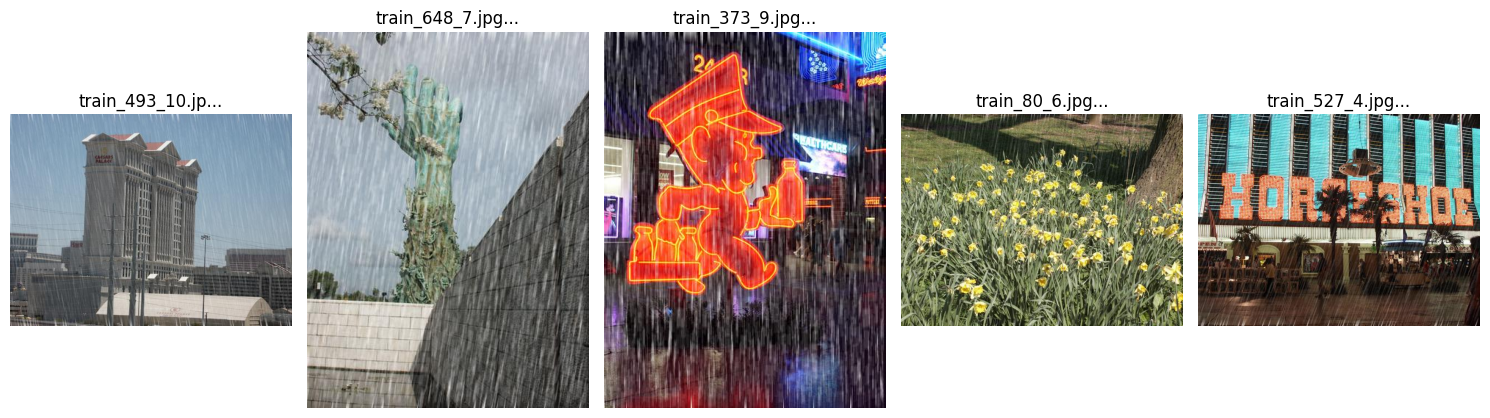

In [ ]:
import matplotlib.pyplot as plt
import cv2

# Get all image paths from the output directory
image_paths = list(output_dir.glob("*.*"))[:5]  # pick first 5 images

# Display images
plt.figure(figsize=(15, 5))
for idx, img_path in enumerate(image_paths):
    img = cv2.imread(str(img_path))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    plt.subplot(1, 5, idx + 1)
    plt.imshow(img)
    plt.title(img_path.name[:15] + "...")
    plt.axis("off")

plt.tight_layout()
plt.show()


## **SNOW DATASET**

In [ ]:
!kaggle datasets download -d djanyhelp/snow-images-db -p /content/FYP/Kaggle_db/snow_dataset

Dataset URL: https://www.kaggle.com/datasets/djanyhelp/snow-images-db
License(s): unknown


In [ ]:
!unzip -q /content/FYP/Kaggle_db/snow_dataset/snow-images-db.zip -d /content/FYP/Kaggle_db/snow_dataset/

**clear snow**

In [ ]:
import os
import shutil
from pathlib import Path

# Source directories
train_dir = Path("/content/FYP/Kaggle_db/snow_dataset/Snow-Covered-Roads-Dataset/dataset/test/clear")
test_dir = Path("/content/FYP/Kaggle_db/snow_dataset/Snow-Covered-Roads-Dataset/dataset/train/clear")

# Destination directory
output_dir = Path("/content/FYP/I2I/clear_snow_db")
output_dir.mkdir(parents=True, exist_ok=True)

# Function to copy files with prefix
def copy_images(src_dir, prefix):
    for img in src_dir.glob("*.*"):  # include all image types
        dest = output_dir / f"{prefix}_{img.name}"
        shutil.copy(img, dest)

# Copy training and testing images
copy_images(train_dir, "train")
copy_images(test_dir, "test")

print(f"All images copied to: {output_dir}")

All images copied to: /content/FYP/I2I/clear_snow_db


In [ ]:
# Count total images in the output directory
total_images = len(list(output_dir.glob("*.*")))
print(f"Total images in '{output_dir}': {total_images}")

Total images in '/content/FYP/I2I/clear_snow_db': 19744


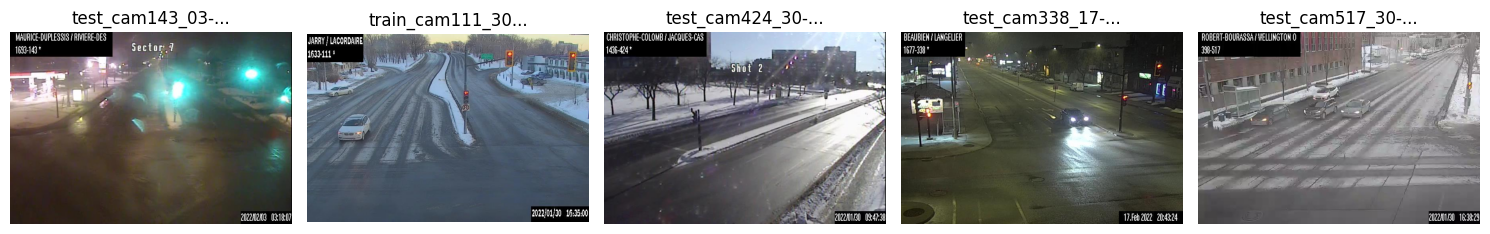

In [ ]:
import matplotlib.pyplot as plt
import cv2

# Get all image paths from the output directory
image_paths = list(output_dir.glob("*.*"))[:5]  # pick first 5 images

# Display images
plt.figure(figsize=(15, 5))
for idx, img_path in enumerate(image_paths):
    img = cv2.imread(str(img_path))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    plt.subplot(1, 5, idx + 1)
    plt.imshow(img)
    plt.title(img_path.name[:15] + "...")
    plt.axis("off")

plt.tight_layout()
plt.show()


**light snow**

In [ ]:
import os
import shutil
from pathlib import Path

# Source directories
train_dir = Path("/content/FYP/Kaggle_db/snow_dataset/Snow-Covered-Roads-Dataset/dataset/test/light")
test_dir = Path("/content/FYP/Kaggle_db/snow_dataset/Snow-Covered-Roads-Dataset/dataset/train/light")

# Destination directory
output_dir = Path("/content/FYP/I2I/light_snow_db")
output_dir.mkdir(parents=True, exist_ok=True)

# Function to copy files with prefix
def copy_images(src_dir, prefix):
    for img in src_dir.glob("*.*"):  # include all image types
        dest = output_dir / f"{prefix}_{img.name}"
        shutil.copy(img, dest)

# Copy training and testing images
copy_images(train_dir, "train")
copy_images(test_dir, "test")

print(f"All images copied to: {output_dir}")

All images copied to: /content/FYP/I2I/light_snow_db


In [ ]:
# Count total images in the output directory
total_images = len(list(output_dir.glob("*.*")))
print(f"Total images in '{output_dir}': {total_images}")

Total images in '/content/FYP/I2I/light_snow_db': 4413


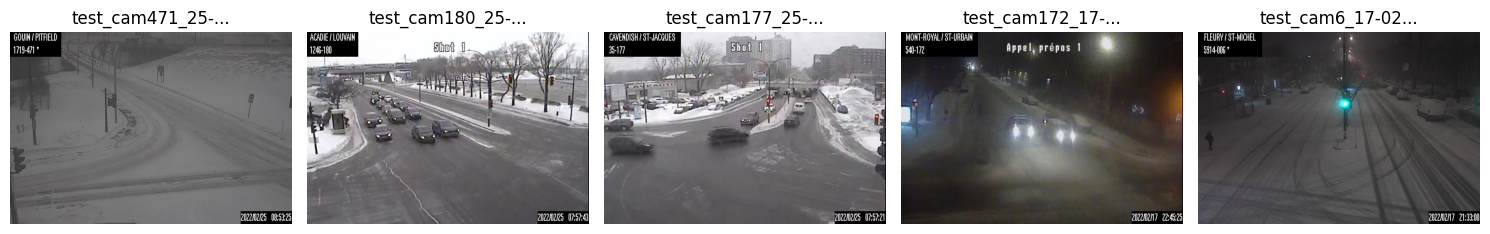

In [ ]:
import matplotlib.pyplot as plt
import cv2

# Get all image paths from the output directory
image_paths = list(output_dir.glob("*.*"))[:5]  # pick first 5 images

# Display images
plt.figure(figsize=(15, 5))
for idx, img_path in enumerate(image_paths):
    img = cv2.imread(str(img_path))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    plt.subplot(1, 5, idx + 1)
    plt.imshow(img)
    plt.title(img_path.name[:15] + "...")
    plt.axis("off")

plt.tight_layout()
plt.show()


**medium snow**

In [ ]:
import os
import shutil
from pathlib import Path

# Source directories
train_dir = Path("/content/FYP/Kaggle_db/snow_dataset/Snow-Covered-Roads-Dataset/dataset/test/medium")
test_dir = Path("/content/FYP/Kaggle_db/snow_dataset/Snow-Covered-Roads-Dataset/dataset/train/medium")

# Destination directory
output_dir = Path("/content/FYP/I2I/medium_snow_db")
output_dir.mkdir(parents=True, exist_ok=True)

# Function to copy files with prefix
def copy_images(src_dir, prefix):
    for img in src_dir.glob("*.*"):  # include all image types
        dest = output_dir / f"{prefix}_{img.name}"
        shutil.copy(img, dest)

# Copy training and testing images
copy_images(train_dir, "train")
copy_images(test_dir, "test")

print(f"All images copied to: {output_dir}")

All images copied to: /content/FYP/I2I/medium_snow_db


In [ ]:
# Count total images in the output directory
total_images = len(list(output_dir.glob("*.*")))
print(f"Total images in '{output_dir}': {total_images}")

Total images in '/content/FYP/I2I/medium_snow_db': 14725


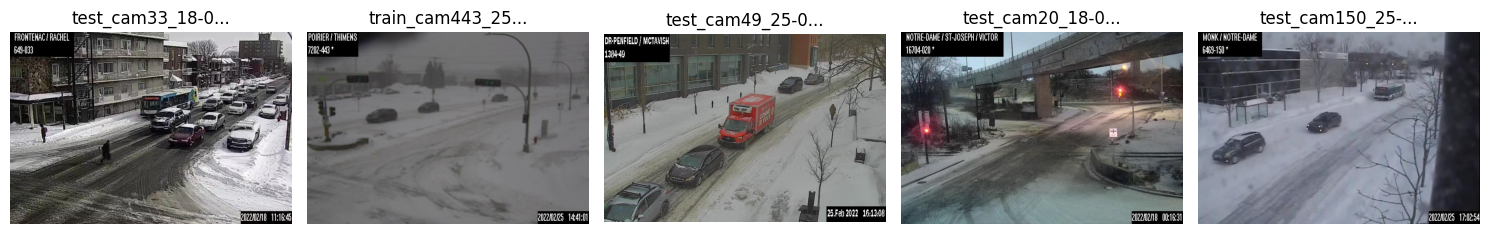

In [ ]:
import matplotlib.pyplot as plt
import cv2

# Get all image paths from the output directory
image_paths = list(output_dir.glob("*.*"))[:5]  # pick first 5 images

# Display images
plt.figure(figsize=(15, 5))
for idx, img_path in enumerate(image_paths):
    img = cv2.imread(str(img_path))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    plt.subplot(1, 5, idx + 1)
    plt.imshow(img)
    plt.title(img_path.name[:15] + "...")
    plt.axis("off")

plt.tight_layout()
plt.show()


**plowed snow**

In [ ]:
import os
import shutil
from pathlib import Path

# Source directories
train_dir = Path("/content/FYP/Kaggle_db/snow_dataset/Snow-Covered-Roads-Dataset/dataset/test/plowed")
test_dir = Path("/content/FYP/Kaggle_db/snow_dataset/Snow-Covered-Roads-Dataset/dataset/train/plowed")

# Destination directory
output_dir = Path("/content/FYP/I2I/plowed_snow_db")
output_dir.mkdir(parents=True, exist_ok=True)

# Function to copy files with prefix
def copy_images(src_dir, prefix):
    for img in src_dir.glob("*.*"):  # include all image types
        dest = output_dir / f"{prefix}_{img.name}"
        shutil.copy(img, dest)

# Copy training and testing images
copy_images(train_dir, "train")
copy_images(test_dir, "test")

print(f"All images copied to: {output_dir}")

All images copied to: /content/FYP/I2I/plowed_snow_db


In [ ]:
# Count total images in the output directory
total_images = len(list(output_dir.glob("*.*")))
print(f"Total images in '{output_dir}': {total_images}")

Total images in '/content/FYP/I2I/plowed_snow_db': 3512


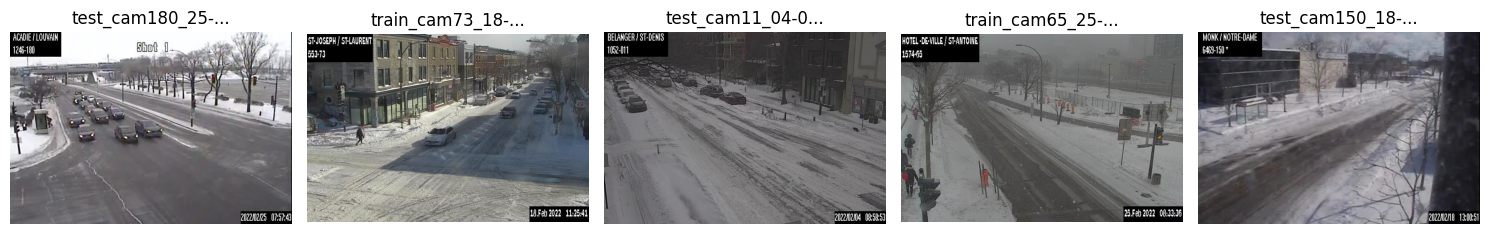

In [ ]:
import matplotlib.pyplot as plt
import cv2

# Get all image paths from the output directory
image_paths = list(output_dir.glob("*.*"))[:5]  # pick first 5 images

# Display images
plt.figure(figsize=(15, 5))
for idx, img_path in enumerate(image_paths):
    img = cv2.imread(str(img_path))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    plt.subplot(1, 5, idx + 1)
    plt.imshow(img)
    plt.title(img_path.name[:15] + "...")
    plt.axis("off")

plt.tight_layout()
plt.show()


## **FOD DATASET**

In [ ]:
!kaggle datasets download -d yessicatuteja/foggy-cityscapes-image-dataset -p /content/FYP/Kaggle_db/fog_dataset

Dataset URL: https://www.kaggle.com/datasets/yessicatuteja/foggy-cityscapes-image-dataset
License(s): CC0-1.0


In [ ]:
!unzip -q /content/FYP/Kaggle_db/fog_dataset/foggy-cityscapes-image-dataset.zip -d /content/FYP/Kaggle_db/fog_dataset/

In [ ]:
import os
import shutil
from pathlib import Path

# Source directories
dense_dir = Path("/content/FYP/Kaggle_db/fog_dataset/Foggy_Cityscapes/Dense_Fog")
medium_dir = Path("/content/FYP/Kaggle_db/fog_dataset/Foggy_Cityscapes/Medium_Fog")
no_dir = Path("/content/FYP/Kaggle_db/fog_dataset/Foggy_Cityscapes/No_Fog")

# Destination base directory
base_output_dir = Path("/content/FYP/I2I")
base_output_dir.mkdir(parents=True, exist_ok=True)

# Function to copy images into a specific subfolder
def copy_images_to_subfolder(src_dir, subfolder_name):
    dest_dir = base_output_dir / subfolder_name
    dest_dir.mkdir(parents=True, exist_ok=True)
    for img in src_dir.glob("*.*"):
        shutil.copy(img, dest_dir / img.name)

# Copy into separate folders
copy_images_to_subfolder(dense_dir, "Dense_Fog")
copy_images_to_subfolder(medium_dir, "Medium_Fog")
copy_images_to_subfolder(no_dir, "No_Fog")

print("Images copied")

Images copied


## **DAY AND NIGHT IMAGES**

In [ ]:
!kaggle datasets download -d raman77768/day-time-and-night-time-road-images -p /content/FYP/Kaggle_db/daynnight_dataset

Dataset URL: https://www.kaggle.com/datasets/raman77768/day-time-and-night-time-road-images
License(s): CC0-1.0


In [ ]:
!unzip -q /content/FYP/Kaggle_db/daynnight_dataset/day-time-and-night-time-road-images.zip -d /content/FYP/Kaggle_db/normal_dataset/

In [ ]:
import os
import shutil
from pathlib import Path

# Source directories
day_dir = Path("/content/FYP/Kaggle_db/normal_dataset/day light road images/day light road images")
night_dir = Path("/content/FYP/Kaggle_db/normal_dataset/night time road images/night time road images")

# Destination directory
output_dir = Path("/content/FYP/I2I/daynnight_db")
output_dir.mkdir(parents=True, exist_ok=True)

# Function to copy files with prefix
def copy_images(src_dir, prefix):
    for img in src_dir.glob("*.*"):  # include all image types
        dest = output_dir / f"{prefix}_{img.name}"
        shutil.copy(img, dest)

# Copy day and night images
copy_images(day_dir, "day")
copy_images(night_dir, "night")

print(f"All images copied to: {output_dir}")

All images copied to: /content/FYP/I2I/daynnight_db


In [ ]:
# Count total images in the output directory
total_images = len(list(output_dir.glob("*.*")))
print(f"Total images in '{output_dir}': {total_images}")

Total images in '/content/FYP/I2I/daynnight_db': 31567


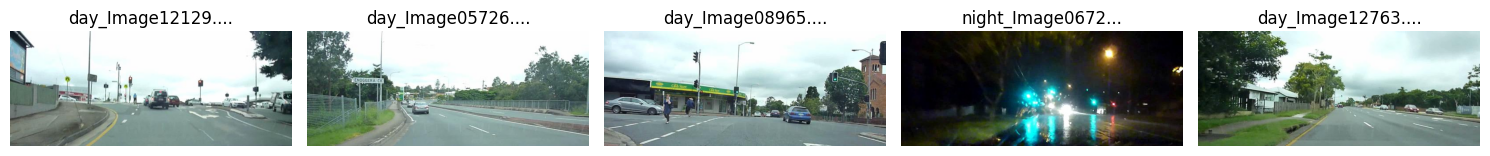

In [ ]:
import matplotlib.pyplot as plt
import cv2

# Get all image paths from the output directory
image_paths = list(output_dir.glob("*.*"))[:5]  # pick first 5 images

# Display images
plt.figure(figsize=(15, 5))
for idx, img_path in enumerate(image_paths):
    img = cv2.imread(str(img_path))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    plt.subplot(1, 5, idx + 1)
    plt.imshow(img)
    plt.title(img_path.name[:15] + "...")
    plt.axis("off")

plt.tight_layout()
plt.show()


# **CSV**

In [ ]:
import os
import pandas as pd

# Define base directory
base_dir = "/content/FYP/I2I"

# Map folder names to their corresponding label columns
folder_label_map = {
    "daynnight_db": "Normal",
    "No_Fog": "Normal",
    "clear_snow_db": "Normal",
    "Medium_Fog": "Medium_Fog",
    "Dense_Fog": "Dense_Fog",
    "light_snow_db": "Light_Snow",
    "medium_snow_db": "Medium_Snow",
    "plowed_snow_db": "Plowed_Snow",
    "rain_db": "Rain"
}

# All possible labels (columns)
all_labels = ["Normal", "Medium_Fog", "Dense_Fog", "Light_Snow", "Medium_Snow", "Plowed_Snow", "Rain"]

# List to store each image row
data = []

# Loop through each folder and process images
for folder, label in folder_label_map.items():
    folder_path = os.path.join(base_dir, folder)
    if not os.path.exists(folder_path):
        print(f"Warning: Folder not found - {folder_path}")
        continue

    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            entry = {
                "Filename": filename
            }
            for lbl in all_labels:
                entry[lbl] = 1 if lbl == label else -1
            data.append(entry)

# Create DataFrame
df = pd.DataFrame(data)

# Save to Excel
output_path = os.path.join(base_dir, "cvae_dataset.xlsx")
df.to_excel(output_path, index=False)

print(f"CSV saved at: {output_path}")


CSV saved at: /content/FYP/I2I/cvae_dataset.xlsx


In [ ]:
import pandas as pd

# Load the Excel file
df = pd.read_excel("/content/FYP/I2I/cvae_dataset.xlsx")

# Display the first 5 rows
print("📄 First 5 Rows:")
display(df.head())

📄 First 5 Rows:


,Filename,Normal,Medium_Fog,Dense_Fog,Light_Snow,Medium_Snow,Plowed_Snow,Rain
0,day_Image12129.jpg,1,-1,-1,-1,-1,-1,-1
1,day_Image05726.jpg,1,-1,-1,-1,-1,-1,-1
2,day_Image08965.jpg,1,-1,-1,-1,-1,-1,-1
3,night_Image06723.jpg,1,-1,-1,-1,-1,-1,-1
4,day_Image12763.jpg,1,-1,-1,-1,-1,-1,-1


In [ ]:
# Print the total number of rows
print(f"\nTotal number of rows: {len(df)}")


Total number of rows: 89461


# **MERGE ALL IMAGES INTO SINGLE COLUMN**

In [ ]:
import os
import shutil
from zipfile import ZipFile

# Step 1: Create a merged folder
merged_dir = "/content/FYP/I2I/cvae_dataset_imgs"
os.makedirs(merged_dir, exist_ok=True)

# Step 2: List of all source folders
folders = [
    "Dense_Fog", "Medium_Fog", "No_Fog", "clear_snow_db",
    "light_snow_db", "medium_snow_db", "rain_db",
    "plowed_snow_db", "daynnight_db"
]

# Step 3: Copy all images into merged folder
for folder in folders:
    folder_path = f"/content/FYP/I2I/{folder}"
    for filename in os.listdir(folder_path):
        src = os.path.join(folder_path, filename)
        dst = os.path.join(merged_dir, filename)
        # Prevent overwriting in case of name clash
        if not os.path.exists(dst):
            shutil.copy(src, dst)

# Step 4: Zip the merged folder
zip_path = "/content/cvae_dataset_imgs.zip"
shutil.make_archive("/content/cvae_dataset_imgs", 'zip', merged_dir)

print(f"Zip created at: {zip_path}")


Zip created at: /content/cvae_dataset_imgs.zip


In [ ]:
from zipfile import ZipFile

# Path to the zip file
zip_path = "/content/cvae_dataset_imgs.zip"

# Open and count files inside the zip
with ZipFile(zip_path, 'r') as zip_ref:
    total_files = len([f for f in zip_ref.namelist() if not f.endswith("/")])

print(f"Total images in ZIP: {total_files}")


Total images in ZIP: 88282


## **Directly TO Kaggle**

In [ ]:
import os
import shutil
import json

# Create a folder for the dataset
dataset_dir = "/content/cvae_kaggle_dataset"
os.makedirs(dataset_dir, exist_ok=True)

# Move the Excel file and ZIP file into that folder
shutil.copy("/content/FYP/I2I/cvae_dataset.xlsx", f"{dataset_dir}/cvae_dataset.xlsx")
shutil.copy("/content/cvae_dataset_imgs.zip", f"{dataset_dir}/cvae_dataset_imgs.zip")

'/content/cvae_kaggle_dataset/cvae_dataset_imgs.zip'

In [ ]:
dataset_metadata = {
    "title": "CVAE Weather Dataset",
    "id": "djanyhelp/cvae-allmerger-weather-dataset",
    "licenses": [{"name": "CC0-1.0"}],
    "visibility": "private"
}

with open(os.path.join(dataset_dir, "dataset-metadata.json"), "w") as f:
    json.dump(dataset_metadata, f, indent=4)


In [ ]:
!pip install -q kaggle
!kaggle datasets create -p /content/cvae_kaggle_dataset --dir-mode zip


Starting upload for file cvae_dataset.xlsx
100% 2.36M/2.36M [00:00<00:00, 3.40MB/s]
Upload successful: cvae_dataset.xlsx (2MB)
Starting upload for file cvae_dataset_imgs.zip
100% 4.64G/4.64G [00:46<00:00, 106MB/s] 
Upload successful: cvae_dataset_imgs.zip (5GB)
Dataset creation error: The requested title "CVAE Weather Dataset" is already in use by a dataset. Please choose another title.
